### Antoine Levrier
*PHEIGES, all-cell-free phage synthesis and selection from engineered genomes*

# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

### this script takes as entry the refined files resulting from NGS data analysis on Galaxy (https://usegalaxy.org/) as described in the material and methods.


In [36]:
#to abtain E1, E2 and E3 run this script by replacing 'E0.xlsx' by 'E1.xlsx', 'E2.xlsx', 'E3.xlsx'.
data = pd.read_excel('E0.xlsx')
data.head()

,POS,REF,ALT,REF_DP,REF_RV,REF_QUAL,ALT_DP,ALT_RV,ALT_QUAL,ALT_FREQ,TOTAL_DP,PVAL,PASS,GFF_FEATURE,REF_CODON,REF_AA,ALT_CODON,ALT_AA
0,1,g,T,618412,12,33,95,0,32,0.000154,618616,1.0,False,NaN,NaN,NaN,NaN,NaN
1,1,g,A,618412,12,33,89,0,33,0.000144,618616,1.0,False,NaN,NaN,NaN,NaN,NaN
2,1,g,C,618412,12,33,20,0,33,0.000032,618616,1.0,False,NaN,NaN,NaN,NaN,NaN
3,2,g,T,612284,11,33,54,0,32,0.000088,612386,1.0,False,NaN,NaN,NaN,NaN,NaN
4,2,g,A,612284,11,33,39,0,33,0.000064,612386,1.0,False,NaN,NaN,NaN,NaN,NaN


In [37]:
#importing the data into lists.
position= [x for x in data['POS']]
ref= [x.upper() for x in data['REF']]
mut=[x for x in data['ALT']]
alt_freq=[x for x in data['ALT_FREQ']]
total_dp=[x for x in data['TOTAL_DP']]
#print(mut)

In [38]:
#creating a list of list.
list=[]
for x in range (len(position)):
    list.append([position[x], ref[x], mut[x], alt_freq[x], total_dp[x]])
#print(list)

In [39]:
#curing the list from deletions to keep only substitutions.
cleaned_list=[]
for x in list:
    if x[2]=='A':
        cleaned_list.append(x)
    elif x[2]=='C':
        cleaned_list.append(x)
    elif x[2]=='T':
        cleaned_list.append(x)
    elif x[2]=='G':
        cleaned_list.append(x)
    else:
        pass
#print(cleaned_list, len(cleaned_list))

In [40]:
#at each posision in the sequence, summing the frequencies of each possible substitution.

sum_freq_by_pos = []
for x in range (0, len(cleaned_list), 3):
    sum_freq= cleaned_list[x][3] + cleaned_list[x+1][3] + cleaned_list[x+2][3]
    sum_freq_by_pos.append(sum_freq)

#print(sum_freq_by_pos, len(sum_freq_by_pos))

### Getting the average mutation frequency accross the whole sequence

In [41]:
#now I have cleaned_list and sum of the freq for each position in the sequence.
#get the mean mutation per sequence
mean_mut_seq = statistics.mean(sum_freq_by_pos)*565
print('the mean mutation rate across the sequence is: ', mean_mut_seq)

the mean mutation rate across the sequence is:  0.15297556164


### Plotting the mutation frequency at each nucleotide position across the sequence

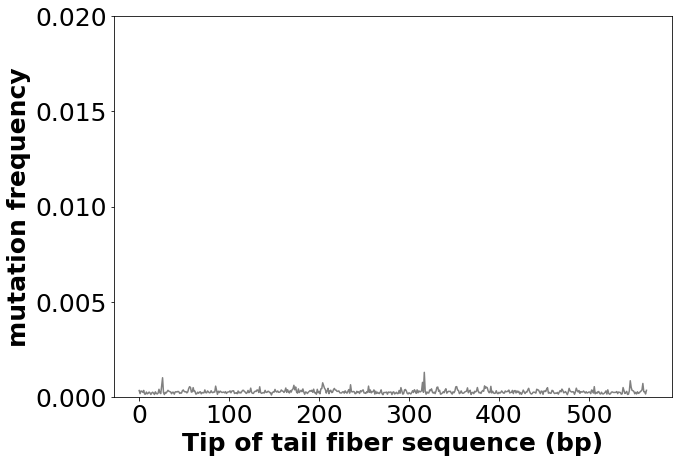

In [42]:
#plotting the sum of the substitution frequency at each position of the sequence.
x = np.arange(0., 565, 1)
Sum_freq_by_pos = [x*566 for x in sum_freq_by_pos]

fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, sum_freq_by_pos, color='gray')

ax.set_ylim([0, 0.02])
ax.tick_params(axis='y', labelsize=25)

ax.set_xlabel('Tip of tail fiber sequence (bp)', fontsize=25, fontweight ='bold')
ax.tick_params(axis='x', labelsize=25)
ax.set_ylabel('mutation frequency', fontsize=25, fontweight ='bold')

#plt.savefig("Fig 5c E0.svg", format='svg')
plt.show()

### Supplementary Figure 19. Calculating the mean substitution probability table across the sequence for each possible nucleotide substitution.

In [43]:
#set all the possible nucleotide substitutions probabilities to 0, (e.g. AC corresponds to substitution A-->C and tAC is the total number of A-->C substitutions.)
AC, AT, AG = [],[],[]
tAC, tAT, tAG =0, 0, 0

CA, CT, CG = [],[],[]
tCA, tCT, tCG = 0, 0, 0

TA, TC, TG = [],[],[]
tTA, tTC, tTG = 0, 0, 0

GA, GC, GT = [],[],[]
tGA, tGC, tGT = 0, 0, 0

In [44]:
#Calculate the cummulative number of substitutions across the sequence by multiplying at each position the frequency (alt_freq) by the number of reads of this position (total_dp).
i=0
for x in cleaned_list:
    if x[1]=='A':
        if x[2] == 'C':
            AC.append(x[3]*x[4])
            tAC+=x[4]
        elif x[2] == 'T':
            AT.append(x[3]*x[4])
            tAT+=x[4]
        elif x[2] == 'G':
            AG.append(x[3]*x[4])
            tAG+=x[4]
            
    if x[1]=='C':
        if x[2] == 'A':
            CA.append(x[3]*x[4])
            tCA+=x[4]
        elif x[2] == 'T':
            CT.append(x[3]*x[4])
            tCT+=x[4]
        elif x[2] == 'G':
            CG.append(x[3]*x[4])
            tCG+=x[4]
            
    if x[1]=='T':
        if x[2] == 'A':
            TA.append(x[3]*x[4])
            tTA+=x[4]
        elif x[2] == 'C':
            TC.append(x[3]*x[4])
            tTC+=x[4]
        elif x[2] == 'G':
            TG.append(x[3]*x[4])
            tTG+=x[4]
            
    if x[1]=='G':
        if x[2] == 'A':
            GA.append(x[3]*x[4])
            tGA+=x[4]
        elif x[2] == 'C':
            GC.append(x[3]*x[4])
            tGC+=x[4]
        elif x[2] == 'T':
            GT.append(x[3]*x[4])
            tGT+=x[4]
            
    i+=1/3

In [45]:
#calculate the substitutions probabilities by dividing the cummulative number of substitution weighted by frequency by the total number of substitutions for this substitution in the sequence.
pAC = sum(AC)/tAC
pAT = sum(AC)/tAT
pAG = sum(AC)/tAG

pCA = sum(AC)/tCA
pCT = sum(AC)/tCT
pCG = sum(AC)/tCG

pTA = sum(AC)/tTA
pTC = sum(AC)/tTC
pTG = sum(AC)/tTG

pGA = sum(GA)/tGA
pGC = sum(GC)/tGC
pGT = sum(GT)/tGT

#print(pAC, pAT, pAG)
#print(tAC, tAT, tAG)

In [46]:
#display the probablilities as a dataframe.
d = {
     'ref\mut': ['A', 'C', 'T', 'G'],
     'A': ['-', pCA/(pCA+pCT+pCG), pTA/(pTA+pTC+pTG), pGA/(pGA+pGC+pGT)],
     'C': [pAC/(pAC+pAT+pAG), '-', pTC/(pTA+pTC+pTG), pGC/(pGA+pGC+pGT)],
     'T': [pAT/(pAC+pAT+pAG), pCT/(pCA+pCT+pCG), '-',pGT/(pGA+pGC+pGT)],
     'G': [pAG/(pAC+pAT+pAG), pCG/(pCA+pCT+pCG), pTG/(pTA+pTC+pTG), '-']
}
E1 = pd.DataFrame(data=d)
E1
#print( pGA/(pGA+pGC+pGT))

,ref\mut,A,C,T,G
0,A,-,0.333333,0.333333,0.333333
1,C,0.333333,-,0.333333,0.333333
2,T,0.333333,0.333333,-,0.333333
3,G,0.479846,0.0696675,0.450486,-
